In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
file_list = os.listdir('./K-means/datasets')
file_list = [file.split('.')[0] for file in file_list]
file_list.remove('preprocessed_dataset')
file_list

['busan',
 'chungbuk',
 'chungnam',
 'daegu',
 'daejeon',
 'gangwon',
 'gwangju',
 'gyeongbuk',
 'gyeonggi',
 'gyeongnam',
 'incheon',
 'jeju',
 'jeonbuk',
 'jeonnam',
 'population',
 'sejong',
 'seoul',
 'ulsan']

# Preprocessing

In [5]:
for i in file_list:
    exec(f"{i} = pd.read_csv('./K-means/datasets/{i}.csv', encoding = 'cp949')")

In [6]:
population.head(3)

,행정기관코드,기준연월,시도명,시군구명,읍면동명,계,남자,여자,만0세남자,만1세남자,...,만101세여자,만102세여자,만103세여자,만104세여자,만105세여자,만106세여자,만107세여자,만108세여자,만109세여자,만110세이상여자
0,1111051500,2023-02-28,서울특별시,종로구,청운효자동,11605,5325,6280,14,22,...,1,0,0,0,0,0,0,0,0,0
1,1111053000,2023-02-28,서울특별시,종로구,사직동,9120,4060,5060,12,24,...,0,0,0,0,0,0,0,0,0,0
2,1111054000,2023-02-28,서울특별시,종로구,삼청동,2322,1104,1218,2,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
population.head(3).iloc[2]

행정기관코드       1111054000
기준연월         2023-02-28
시도명               서울특별시
시군구명                종로구
읍면동명                삼청동
                ...    
만106세여자               0
만107세여자               0
만108세여자               0
만109세여자               0
만110세이상여자             0
Name: 2, Length: 230, dtype: object

In [8]:
population = population.drop(population.columns[6:], axis = 1)
population = population.drop(population.columns[:2], axis = 1)

In [9]:
population

,시도명,시군구명,읍면동명,계
0,서울특별시,종로구,청운효자동,11605
1,서울특별시,종로구,사직동,9120
2,서울특별시,종로구,삼청동,2322
3,서울특별시,종로구,부암동,9178
4,서울특별시,종로구,평창동,17602
...,...,...,...,...
3574,제주특별자치도,서귀포시,서홍동,11236
3575,제주특별자치도,서귀포시,대륜동,15567
3576,제주특별자치도,서귀포시,대천동,13650
3577,제주특별자치도,서귀포시,중문동,12293


In [10]:
location = busan
for i in file_list:
    if i == 'population' or i == 'busan':
        continue
    exec(f'location = pd.concat([location, {i}], ignore_index=True)')

In [11]:
location

,시도,시군구,읍면동/구,읍/면/리/동,리,위도,경도
0,부산광역시,NaN,NaN,NaN,NaN,35.179816,129.075022
1,부산광역시,기장군,NaN,NaN,NaN,35.244498,129.222312
2,부산광역시,기장군,철마면,NaN,NaN,35.275283,129.149712
3,부산광역시,기장군,철마면,임기리,NaN,35.326400,129.136325
4,부산광역시,기장군,철마면,안평리,NaN,35.239700,129.183200
...,...,...,...,...,...,...,...
21811,울산광역시,중구,복산2동,NaN,NaN,35.565815,129.334250
21812,울산광역시,중구,복산1동,NaN,NaN,35.563075,129.327050
21813,울산광역시,중구,반구2동,NaN,NaN,35.563352,129.340860
21814,울산광역시,중구,반구1동,NaN,NaN,35.556433,129.341625


In [12]:
# np.where(location['읍/면/리/동'] == '안평리')
np.where((location['시도'] == '부산광역시') & (location['시군구'] == '기장군') & (location['읍면동/구'] == '철마면'))

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),)

In [13]:
location.loc()[7979]

시도               경상북도
시군구               의성군
읍면동/구             봉양면
읍/면/리/동           안평리
리                 NaN
위도            36.3138
경도         128.560925
Name: 7979, dtype: object

In [14]:
def findIdx(sido, sigungu, eubmyeondong):
    return np.where((location['시도'] == sido) & (location['시군구'] == sigungu) & (location['읍면동/구'] == eubmyeondong))[0]

In [15]:
def findLaLo(sido, sigungu, eubmyeondong):
    try:
        return location.loc()[np.where((location['시도'] == sido) & (location['시군구'] == sigungu) & (location['읍면동/구'] == eubmyeondong))[0]].iloc()[0][5:].tolist()
    except:
        return []

In [16]:
findLaLo('부산광역시', '기장군', '철마면')

[35.2752833, 129.1497125]

In [17]:
dataset = []
for i in range(len(population)):
    if findLaLo(population.iloc()[i]['시도명'], population.iloc()[i]['시군구명'], population.iloc()[i]['읍면동명']) == []:
        continue
    temp_list = []
    temp_list.append(population.iloc()[i]['시도명'])
    temp_list.append(population.iloc()[i]['시군구명'])
    temp_list.append(population.iloc()[i]['읍면동명'])
    temp_list.append(population.iloc()[i]['계'])
    temp_list += findLaLo(population.iloc()[i]['시도명'], population.iloc()[i]['시군구명'], population.iloc()[i]['읍면동명'])
    dataset.append(temp_list)
for i in dataset:
    print(i)

['서울특별시', '종로구', '청운효자동', 11605, 37.5841367, 126.9706519]
['서울특별시', '종로구', '사직동', 9120, 37.576196, 126.9688397]
['서울특별시', '종로구', '삼청동', 2322, 37.5850126, 126.981836]
['서울특별시', '종로구', '부암동', 9178, 37.5924785, 126.9641]
['서울특별시', '종로구', '평창동', 17602, 37.6063166, 126.9681871]
['서울특별시', '종로구', '무악동', 8019, 37.5760032, 126.958148]
['서울특별시', '종로구', '교남동', 9783, 37.5719391, 126.9619364]
['서울특별시', '종로구', '가회동', 3969, 37.5800784, 126.9847995]
['서울특별시', '종로구', '종로1.2.3.4가동', 6760, 37.574461, 126.9902618]
['서울특별시', '종로구', '종로5.6가동', 5396, 37.5720148, 127.0050414]
['서울특별시', '종로구', '이화동', 7096, 37.577008, 127.004338]
['서울특별시', '종로구', '혜화동', 16197, 37.5869186, 127.0005764]
['서울특별시', '종로구', '창신제1동', 4637, 37.570758, 127.016363]
['서울특별시', '종로구', '창신제2동', 7682, 37.574458, 127.010863]
['서울특별시', '종로구', '창신제3동', 6459, 37.5779055, 127.0150474]
['서울특별시', '종로구', '숭인제1동', 5783, 37.5778049, 127.0156274]
['서울특별시', '종로구', '숭인제2동', 9825, 37.574867, 127.019988]
['서울특별시', '중구', '소공동', 2228, 37.562442, 126.977025]
[

In [18]:
len(dataset)

3028

In [19]:
df = pd.DataFrame(dataset, columns = ['시도명', '시군구명', '읍면도명', '인구수', '위도', '경도'])

In [20]:
df

,시도명,시군구명,읍면도명,인구수,위도,경도
0,서울특별시,종로구,청운효자동,11605,37.584137,126.970652
1,서울특별시,종로구,사직동,9120,37.576196,126.968840
2,서울특별시,종로구,삼청동,2322,37.585013,126.981836
3,서울특별시,종로구,부암동,9178,37.592478,126.964100
4,서울특별시,종로구,평창동,17602,37.606317,126.968187
...,...,...,...,...,...,...
3023,제주특별자치도,서귀포시,서홍동,11236,33.256000,126.560242
3024,제주특별자치도,서귀포시,대륜동,15567,33.247990,126.511313
3025,제주특별자치도,서귀포시,대천동,13650,33.250762,126.477574
3026,제주특별자치도,서귀포시,중문동,12293,33.253344,126.433671


In [21]:
df = df.dropna(axis=0)
df = df.reset_index(drop=True)
df

,시도명,시군구명,읍면도명,인구수,위도,경도
0,서울특별시,종로구,청운효자동,11605,37.584137,126.970652
1,서울특별시,종로구,사직동,9120,37.576196,126.968840
2,서울특별시,종로구,삼청동,2322,37.585013,126.981836
3,서울특별시,종로구,부암동,9178,37.592478,126.964100
4,서울특별시,종로구,평창동,17602,37.606317,126.968187
...,...,...,...,...,...,...
3020,제주특별자치도,서귀포시,서홍동,11236,33.256000,126.560242
3021,제주특별자치도,서귀포시,대륜동,15567,33.247990,126.511313
3022,제주특별자치도,서귀포시,대천동,13650,33.250762,126.477574
3023,제주특별자치도,서귀포시,중문동,12293,33.253344,126.433671


In [22]:
df.to_csv('./K-means/datasets/preprocessed_dataset.csv', index = False, encoding="utf-8-sig")

# K-Means Clustering

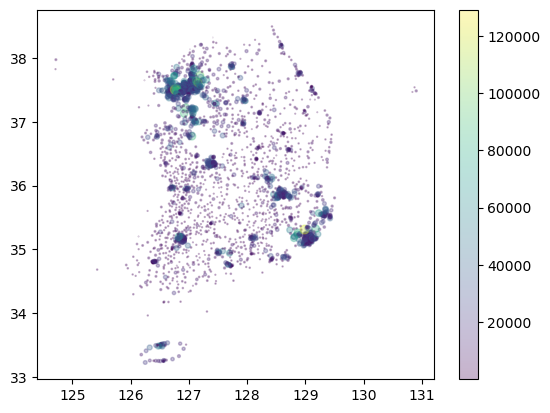

<Figure size 600x800 with 0 Axes>

In [23]:
plt.scatter(df['경도'], df['위도'], c = df['인구수'], alpha = 0.3, s = df['인구수'] / 3000)
plt.colorbar()
plt.figure(figsize=(6,8))
plt.show()

In [24]:
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(df)
plt.scatter(df[:,1], df[:,0], c=kmeans.labels_, alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(kmeans.inertia_)

ValueError: could not convert string to float: '서울특별시'

In [25]:
df['인구수'].min(), df['인구수'].max(), df['인구수'].mean(), df['인구수'].median()

(60, 129147, 13397.603966942148, 9134.0)

In [26]:
df['가중치'] = round(df['인구수'] / 1000) + 1

In [27]:
df

,시도명,시군구명,읍면도명,인구수,위도,경도,가중치
0,서울특별시,종로구,청운효자동,11605,37.584137,126.970652,13.0
1,서울특별시,종로구,사직동,9120,37.576196,126.968840,10.0
2,서울특별시,종로구,삼청동,2322,37.585013,126.981836,3.0
3,서울특별시,종로구,부암동,9178,37.592478,126.964100,10.0
4,서울특별시,종로구,평창동,17602,37.606317,126.968187,19.0
...,...,...,...,...,...,...,...
3020,제주특별자치도,서귀포시,서홍동,11236,33.256000,126.560242,12.0
3021,제주특별자치도,서귀포시,대륜동,15567,33.247990,126.511313,17.0
3022,제주특별자치도,서귀포시,대천동,13650,33.250762,126.477574,15.0
3023,제주특별자치도,서귀포시,중문동,12293,33.253344,126.433671,13.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     3025 non-null   object 
 1   시군구명    3025 non-null   object 
 2   읍면도명    3025 non-null   object 
 3   인구수     3025 non-null   int64  
 4   위도      3025 non-null   float64
 5   경도      3025 non-null   float64
 6   가중치     3025 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 165.6+ KB


In [29]:
df.iloc[18]

시도명         서울특별시
시군구명           중구
읍면도명           명동
인구수          2728
위도      37.560042
경도      126.98585
가중치           4.0
Name: 18, dtype: object

In [30]:
Data_X = []
for i in range(len(df)):
    for j in range(int(df['가중치'][i])):
        Data_X.append(df['위도'][i])
Data_X

[37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.5841367,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.576196,
 37.5850126,
 37.5850126,
 37.5850126,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.5924785,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.6063166,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5760032,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5719391,
 37.5800784,
 37.5800784,
 37.58007

In [31]:
Data_y = []
for i in range(len(df)):
    for j in range(int(df['가중치'][i])):
        Data_y.append(df['경도'][i])
Data_y

[126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9706519,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.9688397,
 126.981836,
 126.981836,
 126.981836,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9641,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.9681871,
 126.958148,
 126.958148,
 126.958148,
 126.958148,
 126.958148,
 126.958148,
 126.958148,
 126.958148,
 126.958148,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9619364,
 126.9

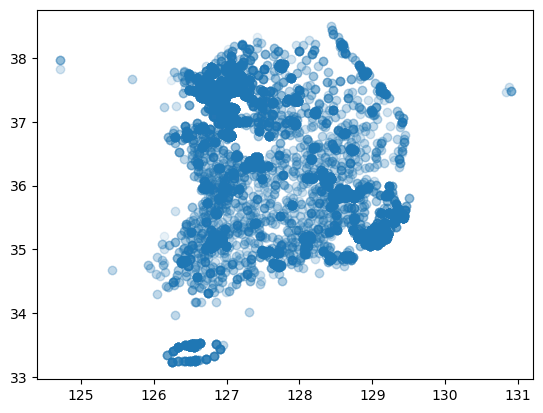

In [32]:
plt.scatter(Data_y, Data_X, alpha = 0.1)

In [33]:
Final_Dataset = []
for i in range(len(Data_X)):
    Final_Dataset.append([Data_X[i], Data_y[i]])
Final_Dataset = np.array(Final_Dataset)
Final_Dataset

array([[ 37.5841367, 126.9706519],
       [ 37.5841367, 126.9706519],
       [ 37.5841367, 126.9706519],
       ...,
       [ 33.2543081, 126.3978458],
       [ 33.2543081, 126.3978458],
       [ 33.2543081, 126.3978458]])

In [34]:
from sklearn.cluster import KMeans

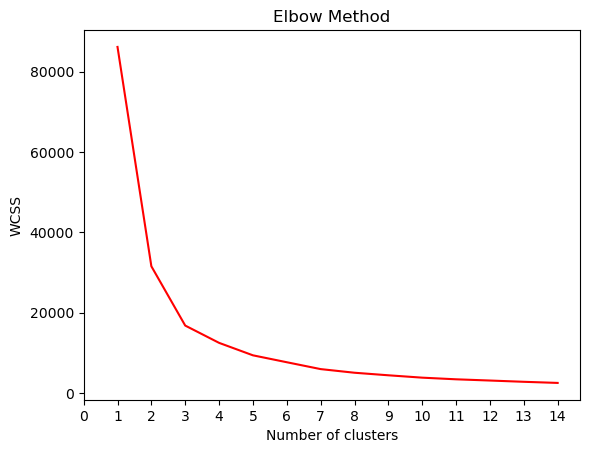

WCSS: [86131.41514470425, 31535.704571914506, 16777.95313993436, 12475.178020866486, 9373.483842342133, 7652.296753345927, 5944.10057515697, 5037.993901698458, 4403.892460562198, 3813.794146799561, 3404.3168737853293, 3098.89078572585, 2784.00828366187, 2504.2957931772676]


In [35]:
wcss = []
for i in range(1, 15): # k 값을 1부터 10까지 변화하며 elbow plot 그리기
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Final_Dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss, 'r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(list(range(0, 15)))
plt.show()
print("WCSS:", wcss)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

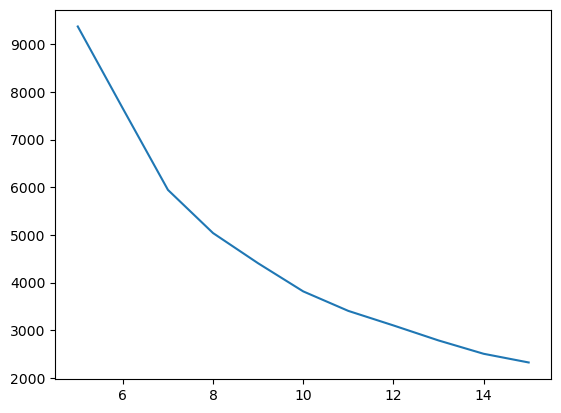

In [36]:
from sklearn.cluster import KMeans

# k 개수
x = []

# 응집도
y = []

for k in range(5, 16):
    k_means = KMeans(n_clusters=k, random_state=124)
    k_means.fit(Final_Dataset)
    
    x.append(k)
    y.append(k_means.inertia_)
    
plt.plot(x, y)

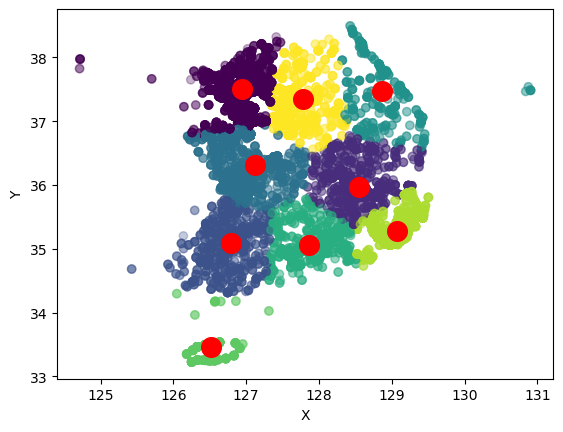

4403.892460562198


In [37]:
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(Final_Dataset)
plt.scatter(Final_Dataset[:,1], Final_Dataset[:,0], c=kmeans.labels_, alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(kmeans.inertia_)

In [44]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

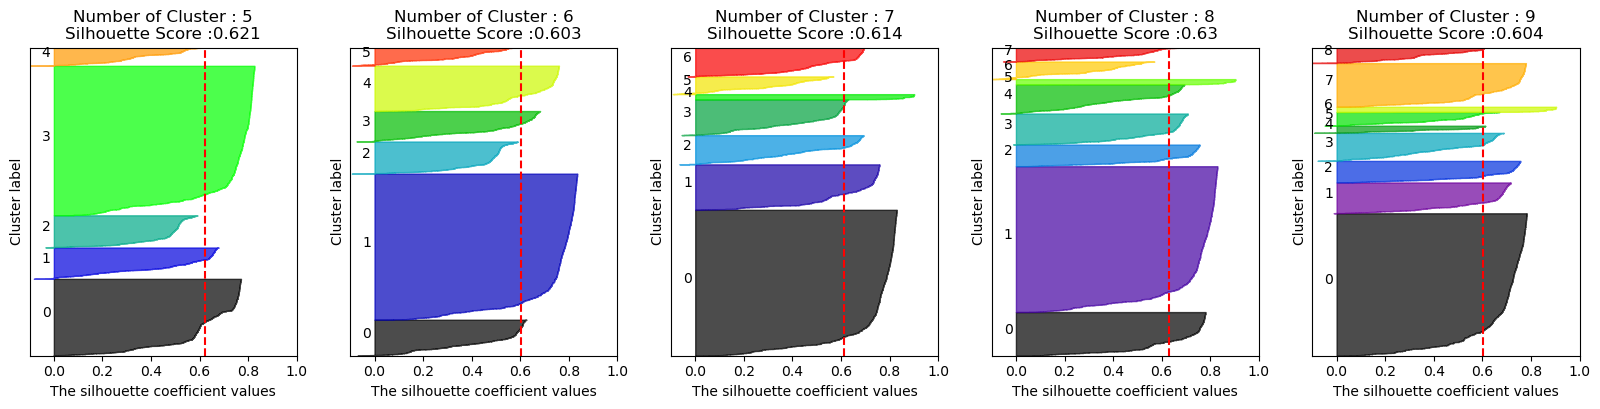

In [45]:

visualize_silhouette([ 5, 6, 7, 8, 9], Final_Dataset)

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(Final_Dataset)
plt.scatter(Final_Dataset[:,1], Final_Dataset[:,0], c=kmeans.labels_, alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(kmeans.inertia_)

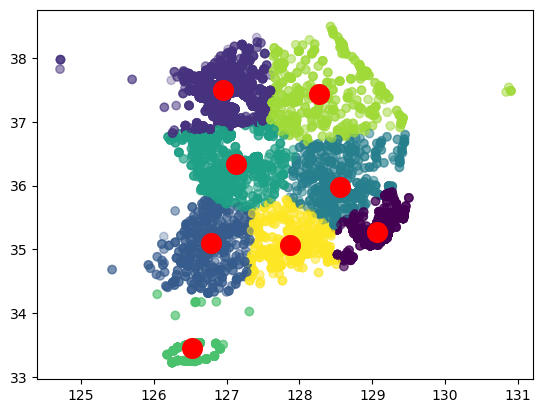

5037.993901698455


In [47]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(Final_Dataset)
plt.scatter(Final_Dataset[:,1], Final_Dataset[:,0], c=kmeans.labels_, alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red')

plt.show()
print(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(Final_Dataset)
plt.scatter(Final_Dataset[:,1], Final_Dataset[:,0], c=kmeans.labels_, alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(kmeans.inertia_)